In [3]:
from zipfile import ZipFile
import os

zip_file_path = '/content/de18b-women-fashion.zip'
extraction_directory = '/content/extracted_content'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['women fashion', '__MACOSX']


In [5]:
# correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['black top, white trousers.jpg',
  'Anarkali suit with a modern twist.jpg',
  'burgundy off-the-shoulder dress with an asymmetrical hemline.jpg',
  'form-fitting dress with a vibrant pattern of yellow, blue, and black.jpg',
  'long, flowing, pink dress with a sparkly texture.jpg',
  'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg',
  'long, elegant, teal dress with a high slit on one side.jpg',
  'strapless red midi dress with a mermaid silhouette.jpg',
  'fitted black dress that reaches down to mid-calf.jpg',
  '.DS_Store'],
 97)

In [4]:
import os

extracted_directory = '/content/extracted_content/women fashion'

if os.path.exists(extracted_directory):
    print(f"Contents of '{extracted_directory}':")
    for root, dirs, files in os.walk(extracted_directory):
        level = root.replace(extracted_directory, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print(f'{subindent}{f}')
else:
    print(f"Directory '{extracted_directory}' not found.")

Contents of '/content/extracted_content/women fashion':
women fashion/
    black top, white trousers.jpg
    Anarkali suit with a modern twist.jpg
    burgundy off-the-shoulder dress with an asymmetrical hemline.jpg
    form-fitting dress with a vibrant pattern of yellow, blue, and black.jpg
    long, flowing, pink dress with a sparkly texture.jpg
    anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg
    long, elegant, teal dress with a high slit on one side.jpg
    strapless red midi dress with a mermaid silhouette.jpg
    fitted black dress that reaches down to mid-calf.jpg
    .DS_Store
    short, white, sleeveless dress with thin straps.jpg
    cream-colored, long, open-front coat with wide lapels.jpg
    tight-fitting, off-the-shoulder white dress 2.jpg
    metallic-looking jacket with intricate designs and fringes hanging from the sleeves.jpg
    high-waisted whi

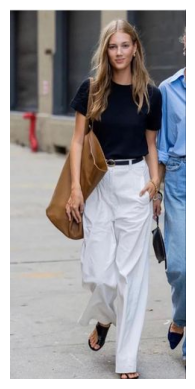

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

# function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# display the first image to understand its characteristics
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
display_image(first_image_path)

In [9]:
import glob

# directory path containing your images
image_directory = '/content/women_fashion/women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

# de18b-women-fashion\women fashion\colorful saree

[]


In [10]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    try:
        input_image_index = all_image_names.index(os.path.basename(input_image_path))
        similar_indices = [idx for idx in similar_indices if idx != input_image_index]
    except ValueError:
        # If the input image is not in the list of all_image_names, do not filter it out.
        pass


    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/extracted_content/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


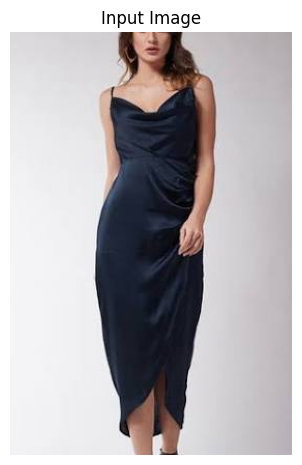

In [13]:
input_image_path = '/content/extracted_content/women fashion/dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4)